In [83]:
!pip3 freeze > requirements.txt

In [79]:
import time
import sys

def solution(S: str, complements: dict) -> int:
    """Parses the input string and returns 1 if it represents
    a properly nested string of brackets, 0 otherwise.

    Parameters
    ----------
    S : str
        - The input string to be parsed.
    complements : dict
        - The alphabet over which the input string is created.
        - A dictionary whose keys are the beginning brackets
        and the values are their complementary ending brackets.
    

    Assumptions
    ------
    - N is an integer within the range [0..200,000]
    - string S consists only of the following characters: "(", "{", "[", "]", "}" and/or ")"
    """
    
    start_time = time.time()
    space_used = 0
    
    if (len(S) % 2) == 1:
        time_used = time.time() - start_time
        return (0, time_used, space_used)
    
    brackets = {'(':')',
               '[':']',
               '{':'}'}
    stack = []

    for char in S:
        space_used = max([space_used, len(stack)])
        if char in brackets.values():
            if stack and brackets[stack[-1]] == char:
                stack.pop()
            else:
                time_used = time.time() - start_time
                return (0, time_used, space_used)
        else:
            stack.append(char)
            
    answer = int(not stack)
    time_used = time.time() - start_time
    return (answer, time_used, space_used)

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

def experiments(expected_outcome: int, experiment_range: range, plot: int = True) -> (list, list, list):

    brackets = {'(':')',
                '[':']',
                '{':'}'}

    answers = []
    times = []
    spaces = []

    if expected_outcome == 0:
        mutation_chance = 0.1
    else:
        mutation_chance = 0

    for n in experiment_range:
        S = ''
        for i in range(n):
            next_char = random.choice(list(brackets.keys()))
            if random.random() < 0.5:
                S = S + next_char
                S = S + brackets[next_char]
            else:
                S = next_char + S
                S = S + brackets[next_char]
                
            if random.random() < mutation_chance:
                mutation_point = random.choice(range(len(S)))
                mutated_S_first = S[:mutation_point]
                mutated_S_second = S[mutation_point:]
                random_char = random.choice(list(set(brackets.keys()).union(set(brackets.values()))))
                S = mutated_S_first + random_char + mutated_S_second
        
        answer, time_used, space_used = solution(S, brackets)
        
        if expected_outcome != answer:
            print("unexpected answer for input: \n" + S)

        answers.append(answer)
        times.append(time_used)
        spaces.append(space_used)
        
    if plot:
        plt.plot(times)
        plt.show()
        plt.clf()
        plt.plot(spaces)
        plt.show()
        
    if expected_outcome == 1:
        false_negative_ratio = (1 - sum(answers)/len(answers)) * 100
        print("False negative ratio: " + str(false_negative_ratio) + "%")
    else:
        false_positive_ratio = (sum(answers)/len(answers)) * 100
        print("False positive ratio: " + str(false_positive_ratio) + "%")
    
    return (answers, times, spaces)

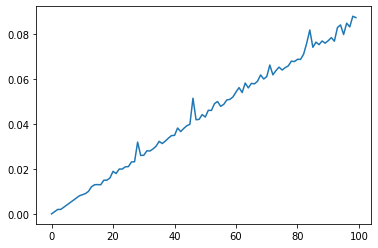

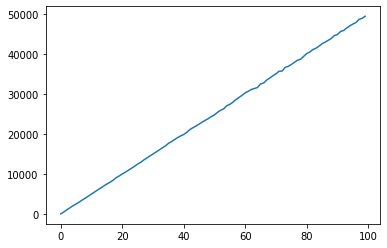

False negative ratio: 0.0%


In [81]:
answers, times, spaces = experiments(expected_outcome = 1, experiment_range = range(0, 100000, 1000))

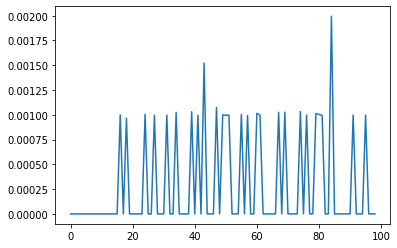

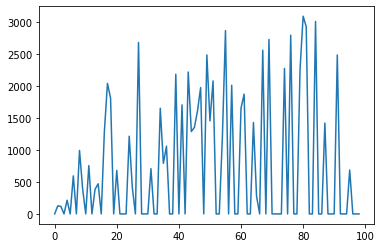

False positive ratio: 0.0%


In [82]:
answers, times, spaces = experiments(expected_outcome = 0, experiment_range = range(1000, 100000, 1000))